In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('120.csv')

In [3]:
df

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.tail()

,weight,height
18,76,150
19,87,167
20,45,129
21,60,146
22,55,160


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  23 non-null     int64
 1   height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.describe()

,weight,height
count,23.000000,23.000000
mean,73.260870,158.652174
std,18.146418,19.293448
min,45.000000,120.000000
25%,59.000000,145.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


Text(0, 0.5, 'heightincm')

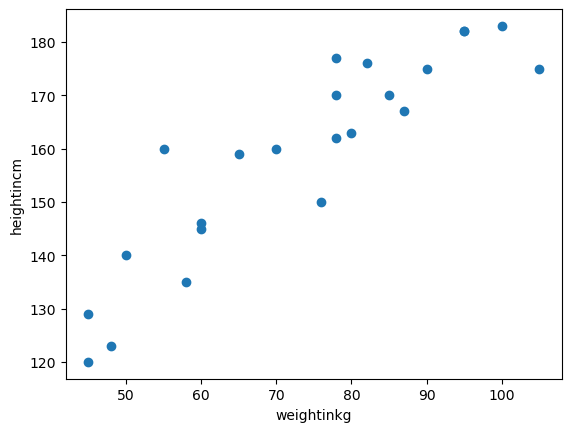

In [11]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weightinkg')
plt.ylabel('heightincm')

In [12]:
#correlation
df.corr()

,weight,height
weight,1.000000,0.904021
height,0.904021,1.000000


C:\Users\kavana k m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kavana k m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kavana k m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kavana k m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


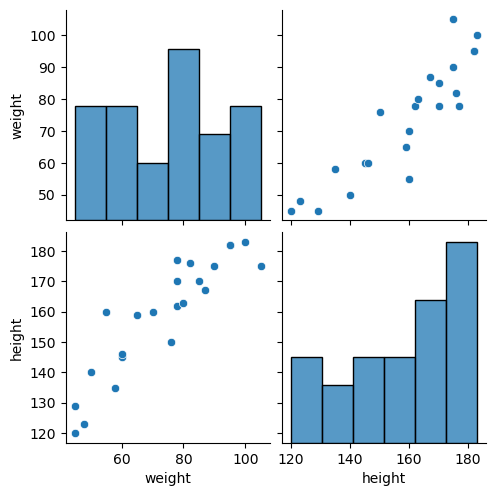

In [13]:
sns.pairplot(df)

In [23]:
#dividing features
X=df[['weight']]
y=df.height

In [22]:
X_series=df['weight']
X.head()

,weight
0,45
1,58
2,48
3,60
4,70


In [28]:
#train test split  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.shape

(17, 1)

In [35]:
#standardization
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-0.81468531],
       [ 1.68181818],
       [ 0.37412587],
       [-1.40909091],
       [ 1.38461538],
       [-1.58741259],
       [-0.6958042 ],
       [-0.1013986 ],
       [ 0.25524476],
       [-1.29020979],
       [-0.6958042 ],
       [-0.99300699],
       [ 1.08741259],
       [ 0.61188811],
       [ 0.79020979],
       [ 0.90909091],
       [ 0.49300699]])

In [37]:
X_test=scaler.transform(X_test)

In [38]:
X_test

array([[ 0.37412587],
       [ 0.37412587],
       [-1.58741259],
       [ 1.38461538],
       [-0.3986014 ],
       [ 1.97902098]])

In [40]:
#apply algo
from sklearn.linear_model import LinearRegression


In [47]:
regression=LinearRegression(n_jobs=-1)

In [48]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [52]:
print('cofficint or slope:',regression.coef_)
print('intercept:',regression.intercept_)

cofficint or slope: [0.9681158]
intercept: 87.40393173260307


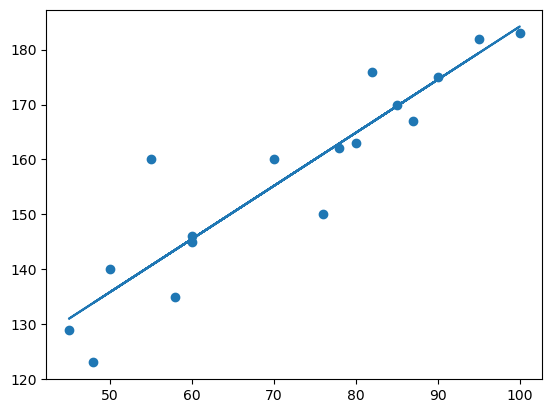

In [54]:
##plot training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [58]:
#predfor test data
y_pred=regression.predict(X_test)

C:\Users\kavana k m\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [60]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6184.873854451421
76.08638621228478
78.64396896425956


In [61]:
from sklearn.metrics import r2_score

In [62]:
score=r2_score(y_test,y_pred)
print(score)

-13.213562640296914


In [66]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [67]:
model.predict(X_test)

array([ 0.79443482,  0.79443482, -3.37077951,  2.94015129, -0.84640719,
        4.20233745])

In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              872.4
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                    2.19e-15
Time:                        19:12:45   Log-Likelihood:                         -76.025
No. Observations:                  17   AIC:                                      154.0
Df Residuals:                      16   BIC:                                      154.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\kavana k m\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
